In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
A = 1.0
F1 = 50
F2 = 150
F3 = 450
N0 = 1000
START = 0.0
END = 1.0

# Задание №1

### Cигнал косинуса с частотами 50, 150 и 450 Гц

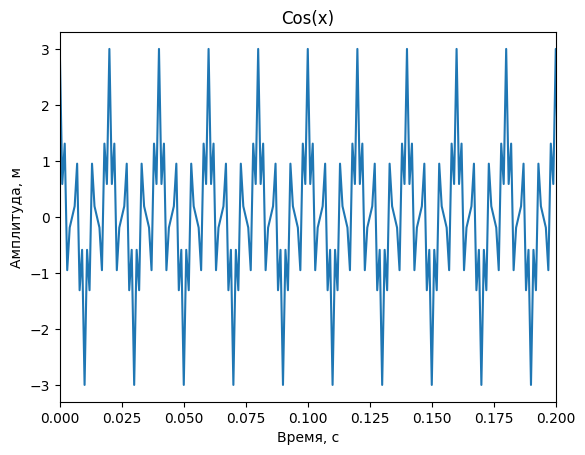

In [36]:
def cyclic_frequency_(f):
    """
    Функция нахождения циклической частоты через частоту

    Параметры
    ---------
    f - частота

    Возвращает
    ----------
    Значение циклической частоты
    """
    return 2 * np.pi * f

def func_1(x, f, A):
    """
    Функция косиинуса заданной частоты 

    Параметры
    ---------
    x - значения оси OX
    f - частота
    A - амплитуда сигнала

    Возвращает
    ----------
    Значение функции косинуса с заданными параметрами 
    """
    return A * np.cos(cyclic_frequency_(f) * x)

X = np.linspace(START, END, N0, endpoint = False)
y1 = np.array([func_1(t, F1, A) for t in X])
y2 = np.array([func_1(t, F2, A) for t in X])
y3 = np.array([func_1(t, F3, A) for t in X])
Y = y1 + y2  + y3

def print_cos():
    plt.xlim(0, 0.2)
    plt.xlabel('Время, с')
    plt.ylabel('Амплитуда, м')
    plt.title('Cos(x)')
    plt.plot(X, Y)
    plt.show()

print_cos()


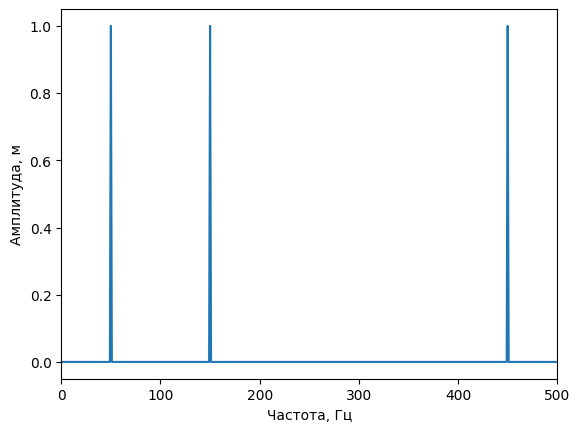

In [37]:
def spectrum(x, y) :
    """
    Нахождение спектра сигнала

    Параметры
    ---------
    x - аргументы функции
    y - значения функции

    Возвращает
    ----------
    
    """
    xff = np.arange(len(x))
    yff = np.fft.fft(y) / len(x)
    return xff, yff 

xf1, yf1 = spectrum(X, Y)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.plot(xf1, 2 * A * yf1)
plt.xlim(0, F3+50)
plt.show()

# Задание №2

### Фильтр Баттерворта нижних частот 2-го порядка (ФНЧ)

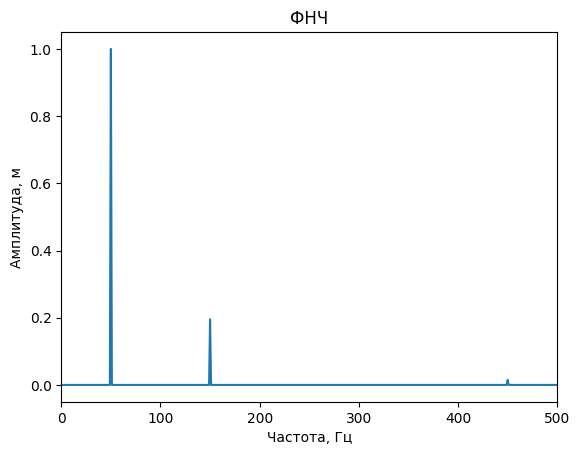

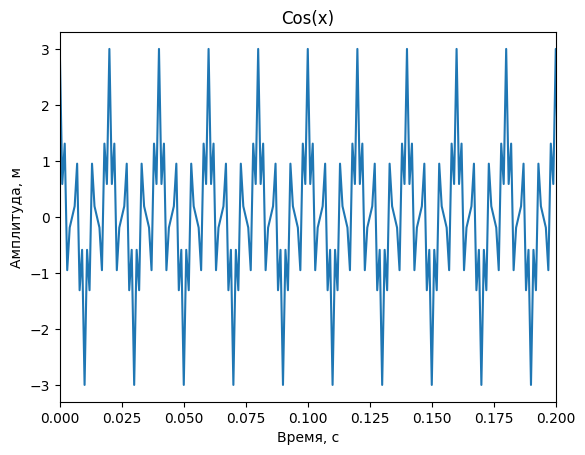

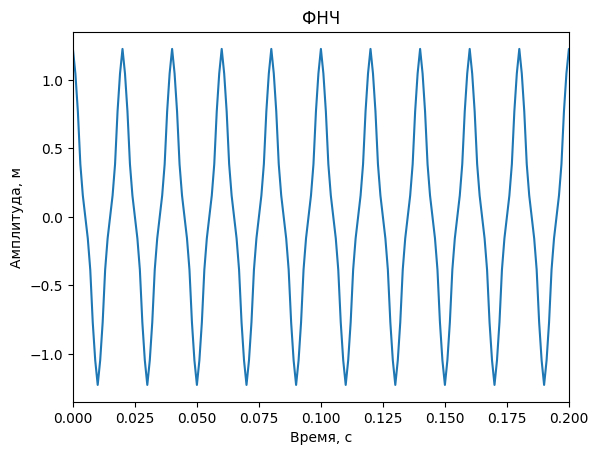

In [38]:
def buttervot_fdw(w, wc):
    """
    Передаточная функция фильтра Баттерворта для низких частот

    Параметры
    ---------
    w - аргумент
    wc - срезовая частота

    Возвращает
    ----------
    Значение предаточной функции заданного аргумента
    """
    return (wc**2 / ((1j*w - wc*np.exp(1j*np.pi/4))*(1j*w - wc*np.exp(1j*np.pi/4*3))))

def FDW(x, y, wc):
    """
    Применение фильтра к исходному сигналу

    Параметры
    ---------
    x - значение функции по оси OX
    y - значения функции по оси OY
    wc - срезовая частота

    Возвращает
    ----------
    Массив значений функции с применением фильтра
    """
    return np.abs([y[t] * buttervot_fdw(t, wc) for t in x])


ydw = FDW(xf1, yf1, 70)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('ФНЧ')
plt.plot(xf1, A * ydw)
plt.xlim(0, F3+50)
plt.show()

print_cos()

ydw = np.fft.ifft(ydw * len(xf1))
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.title('ФНЧ')
plt.plot(X, A * ydw)
plt.xlim(0,0.2)
plt.show()

# Задание №3

### Фильтр высоких частот (ФВЧ)

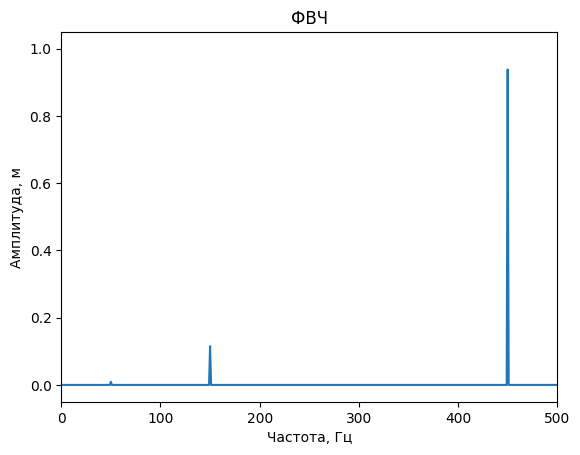

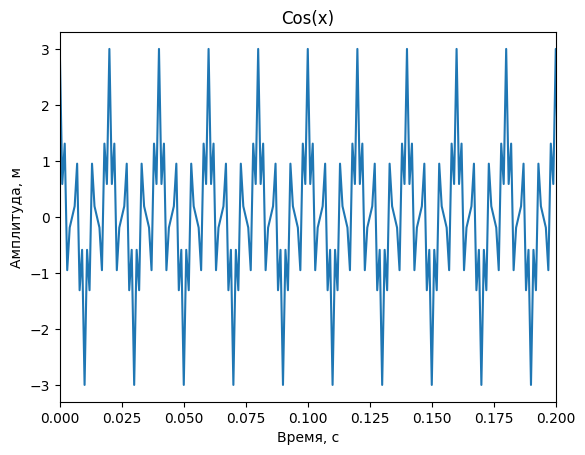

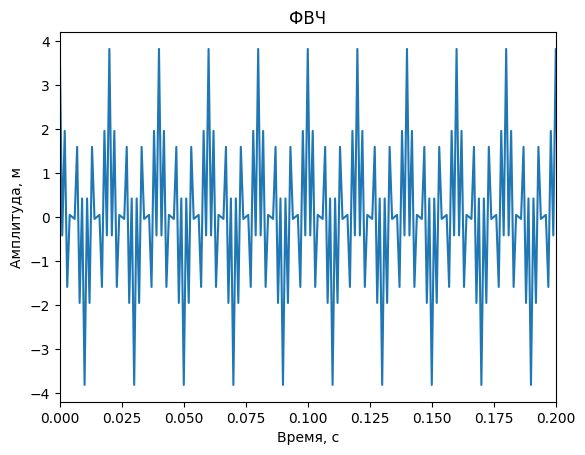

In [39]:
def buttervot_fuw(w, wc):
    """
    Передаточная функция фильтра Баттерворта для высоких частот

    Параметры
    ---------
    w - аргумент
    wc - срезовая частота

    Возвращает
    ----------
    Значение передаточной функции заданного аргумента
    """    
    return (w**2 * 1j/ ((1j * w - wc * np.exp(1j * np.pi / 4))*(1j * w - wc * np.exp(1j * np.pi/4 * 3))))

def FUW(x, y, wc):
    """
    Применение фильтра к исходному сигналу

    Параметры
    ---------
    x - значение функции по оси OX
    y - значения функции по оси OY
    wc - срезовая частота

    Возвращает
    ----------
    Массив значений функции с применением фильтра
    """
    return np.abs([y[t] * buttervot_fuw(t, wc) for t in x])

yuw = FUW(xf1, yf1, 400)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('ФВЧ')
plt.plot(xf1, A * yuw)
plt.xlim(0, F3+50)
plt.show()

print_cos()

yuw = np.fft.ifft(yuw * len(xf1))
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.title('ФВЧ')
plt.plot(X, A * yuw)
plt.xlim(0,0.2)
plt.show()

# Задание №4

### Построить полосовой фильтр

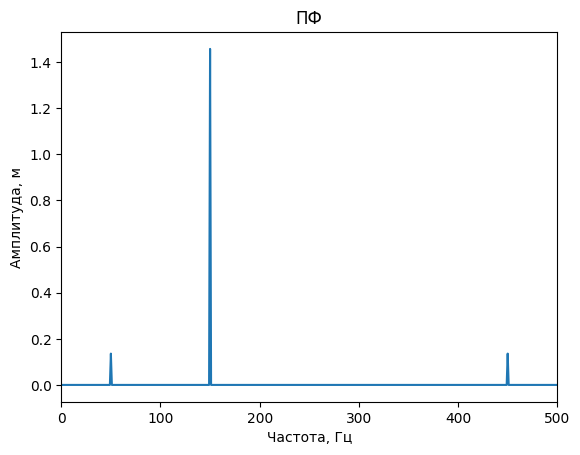

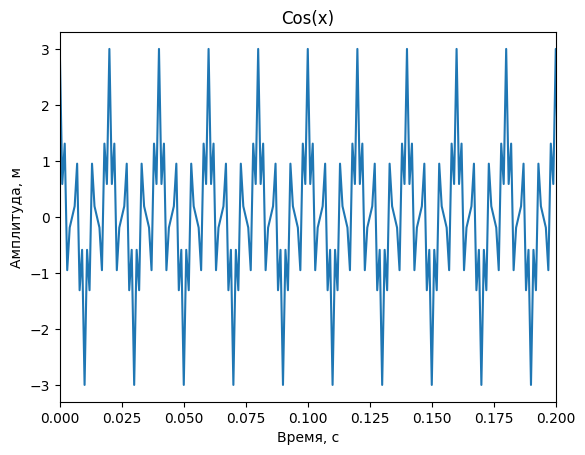

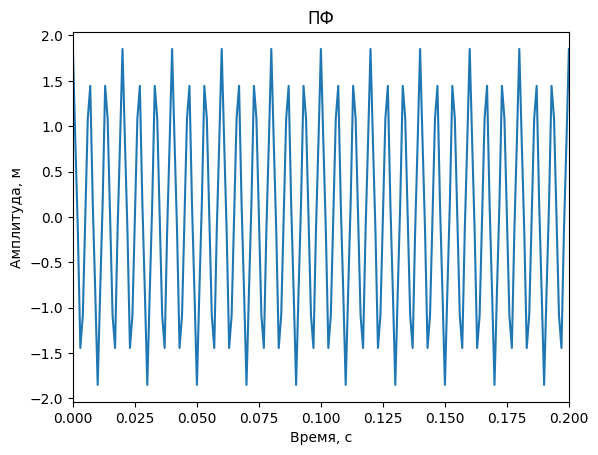

In [40]:
def band_pass_filter(w, wc):
    """
    Передаточная функция полосового фильтра

    Параметры
    ---------
    w - аргумент
    wc - срезовая частота

    Возвращает
    ----------
    Значение передаточной функции заданного аргумента
    """    
    return buttervot_fuw(w, wc) * buttervot_fdw(w, wc)
    # return buttervot_fdw(w * wc, (wc**2 + w**2))

def BF(x, y, wc):
    """
    Применение фильтра к исходному сигналу

    Параметры
    ---------
    x - значение функции по оси OX
    y - значения функции по оси OY
    wc - срезовая частота

    Возвращает
    ----------
    Массив значений функции с применением фильтра
    """
    return np.abs([y[t] * band_pass_filter(t, wc) for t in x])

ybf = BF(xf1, yf1, 150)
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, м')
plt.title('ПФ')
plt.plot(xf1, A * ybf)
plt.xlim(0, F3+50)
plt.show()

print_cos()

ybf = np.fft.ifft(ybf * len(xf1))
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.title('ПФ')
plt.plot(X, A * ybf)
plt.xlim(0, 0.2)
plt.show()

### Построить заграждающий фильтр

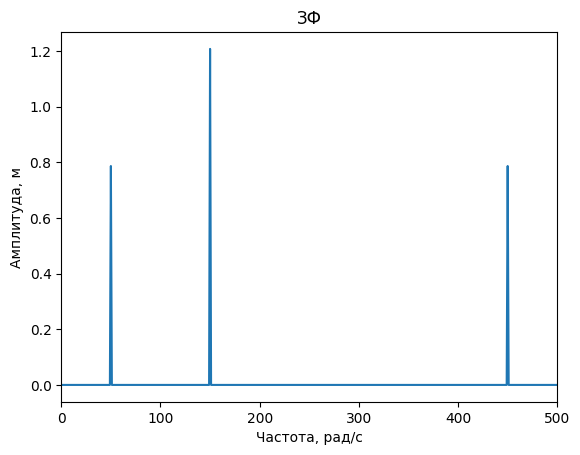

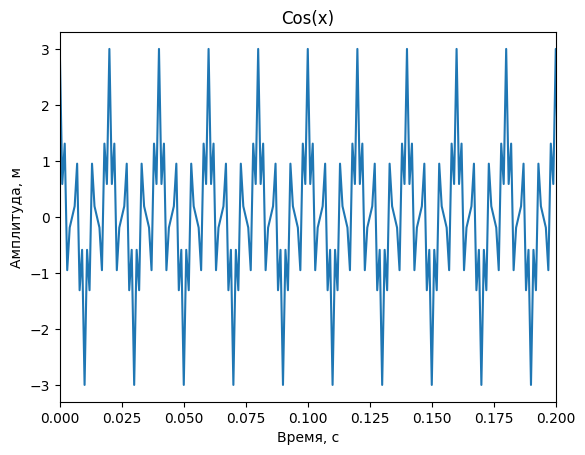

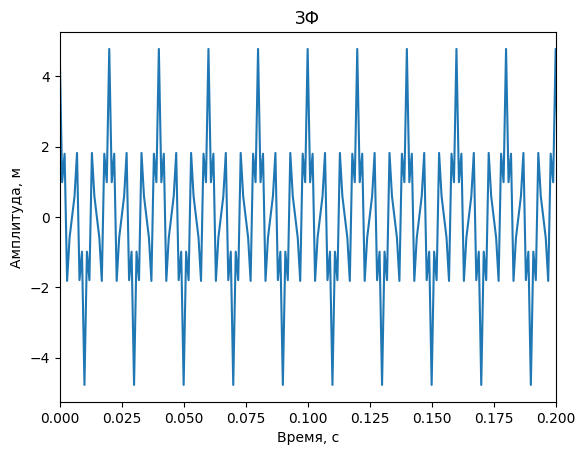

In [41]:
def closing_filter(w, wc):
    """
    Передаточная функция заграждающего фильтра

    Параметры
    ---------
    w - аргумент
    wc - срезовая частота

    Возвращает
    ----------
    Значение передаточной функции заданного аргумента
    """    
    return buttervot_fuw(w, wc) + buttervot_fdw(w, wc)
    # return buttervot_fdw(w * 2 * wc, (wc**2 + np.sqrt(2) * w**2))

def CF(x, y, wc):
    """
    Применение фильтра к исходному сигналу

    Параметры
    ---------
    x - значение функции по оси OX
    y - значения функции по оси OY
    wc - срезовая частота

    Возвращает
    ----------
    Массив значений функции с применением фильтра
    """
    return np.abs([y[t] * closing_filter(t, wc) for t in x])

ycf = CF(xf1, yf1, 150)
plt.xlabel('Частота, рад/с')
plt.ylabel('Амплитуда, м')
plt.title('ЗФ')
plt.plot(xf1, A * ycf)
plt.xlim(0, F3+50)
plt.show()

print_cos()

ycf = np.fft.ifft(ycf * len(xf1))
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.title('ЗФ')
plt.plot(X, A * ycf)
plt.xlim(0, 0.2)
plt.show()

# Задание №5

### Построить фильтр Баттерворта любого порядка

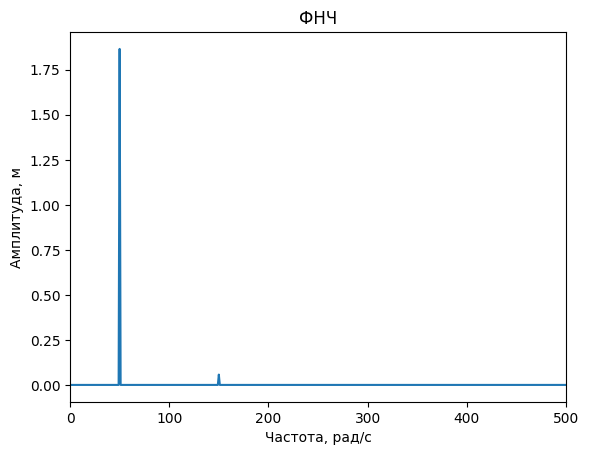

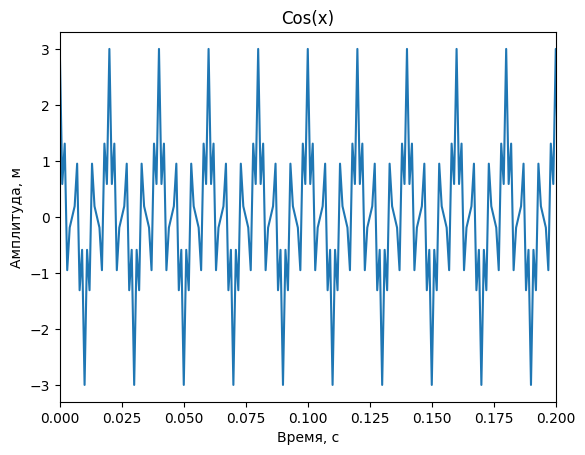

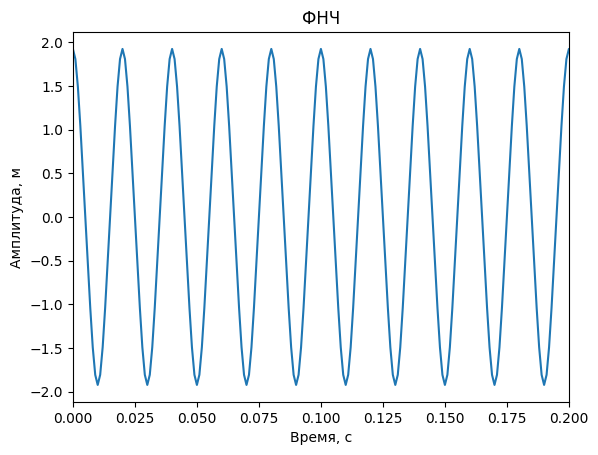

In [42]:
def buttervot_fdw_for_n(w, wc, N):
    """
    Передаточная функция фильтра Баттерворта для низких частот заданного порядка

    Параметры
    ---------
    w - аргумент
    wc - срезовая частота
    N - порядок фильтра
    Возвращает
    ----------
    Значение передаточной функции заданного аргумента
    """    
    res = wc**N
    for k in range(N):
        res /= (1j * w - wc * np.exp(1j * np.pi * (2 * k + N - 1)/(2 * N)))
    return res

def FDW_N(x, y, wc, N):
    """
    Применение фильтра к исходному сигналу

    Параметры
    ---------
    x - значение функции по оси OX
    y - значения функции по оси OY
    wc - срезовая частота
    N - порядок фильтра

    Возвращает
    ----------
    Массив значений функции с применением фильтра
    """
    return np.abs([y[t] * buttervot_fdw_for_n(t, wc, N) for t in x])

ydw = FDW_N(xf1, yf1, 70, 4)
plt.xlabel('Частота, рад/с')
plt.ylabel('Амплитуда, м')
plt.title('ФНЧ')
plt.plot(xf1, A * ydw)
plt.xlim(0, F3+50)
plt.show()

print_cos()

ydw = np.fft.ifft(ydw * len(xf1))
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.title('ФНЧ')
plt.plot(X, A * ydw)
plt.xlim(0,0.2)
plt.show()

# Задание №6

### Фильтрация для зашумленного сигнала

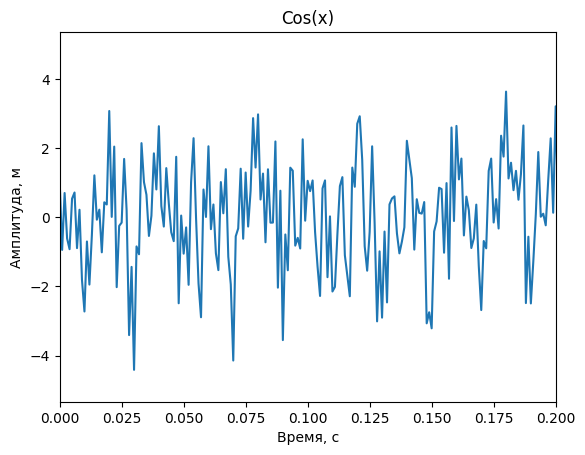

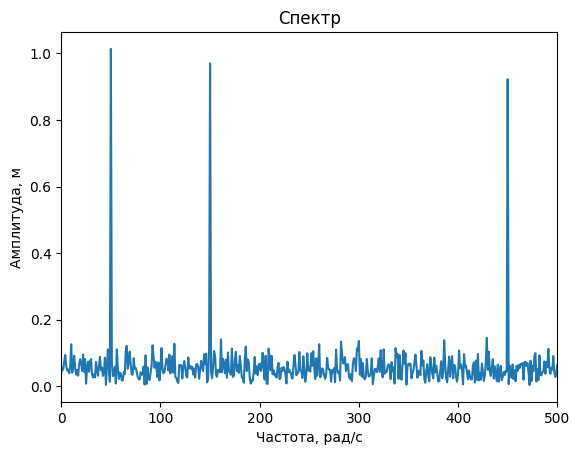

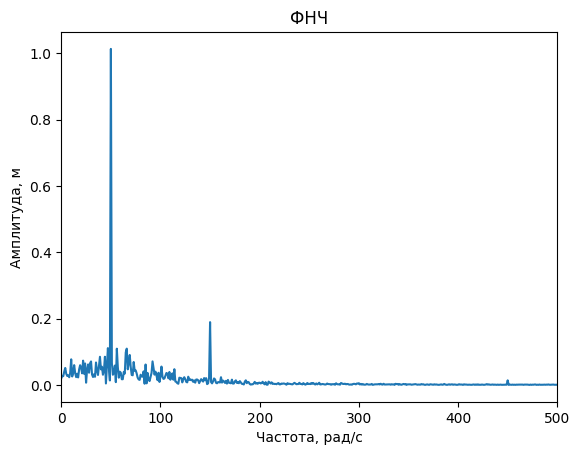

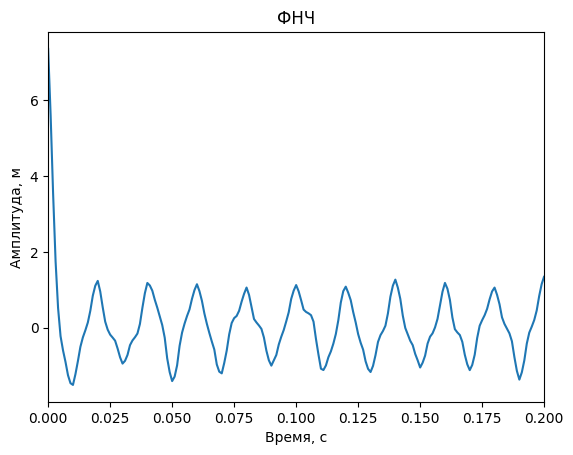

In [43]:
Y_ = Y + np.random.normal(0, 1, X.shape)

plt.xlim(0, 0.2)
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.title('Cos(x)')
plt.plot(X, Y_)
plt.show()

xf1_, yf1_ = spectrum(X, Y_)
plt.xlabel('Частота, рад/с')
plt.ylabel('Амплитуда, м')
plt.title('Спектр')
plt.plot(xf1_, np.abs(2 * A * yf1_))
plt.xlim(0, F3+50)
plt.show()

ydw = FDW_N(xf1_, yf1_, 70, 2)
plt.xlabel('Частота, рад/с')
plt.ylabel('Амплитуда, м')
plt.title('ФНЧ')
plt.plot(xf1_, A * ydw)
plt.xlim(0, F3+50)
plt.show()

ydw = np.fft.ifft(ydw * len(xf1_))
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.title('ФНЧ')
plt.plot(X, A * ydw)
plt.xlim(0,0.2)
plt.show()

# Задание №7

### ФНЧ Чебышева 1го рода N порядка

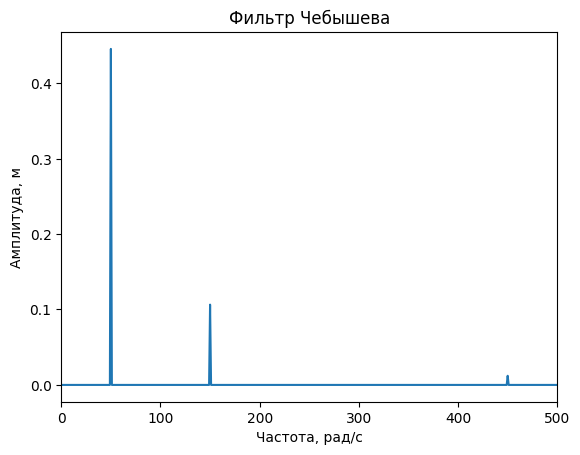

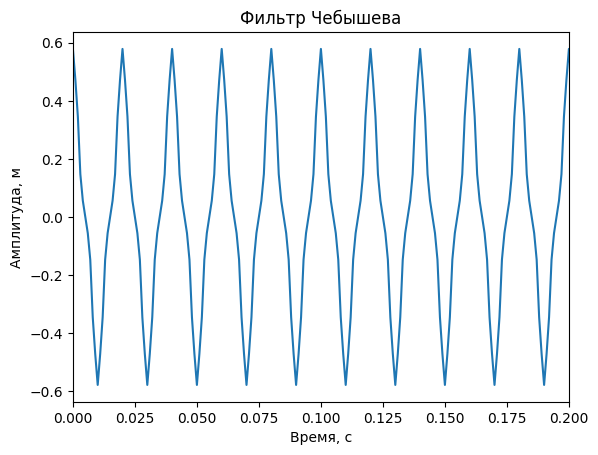

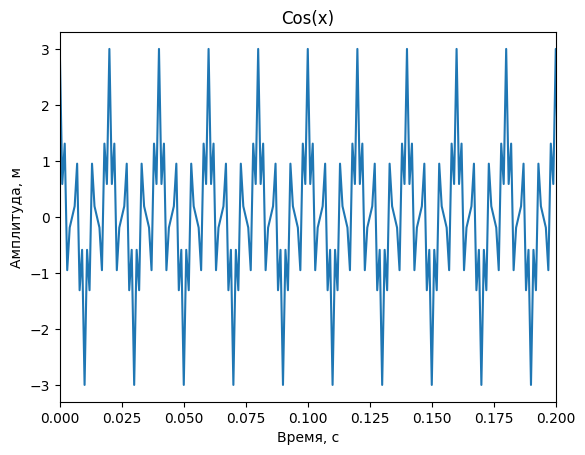

In [44]:
def C(k, n):
    """
    Биномиальный коэффициент

    Параметры
    ---------
    k, n 

    Возвращет
    ---------
    Число сочетаний из n по k
    """
    if k == 0 or k == n:
        return 1
    else:
        return C(k, n - 1) + C(k - 1, n - 1)
    
def T(n, x):
    """
    Многочлен Чебышева

    Параметры
    ---------
    n - порядок многочлена
    x -  аргумент функции

    Возвращает 
    ----------
    Значение многочлена Чебышева для данных аргументов
    """
    t = 0
    for k in range(0, n//2):
        t += C(2*k, n) * (x**2 - 1)**k * x**(n - 2*k)
    return t

def filter_cheb(w, wc, n):
    """
    Фильтр Чебышева 1 рода

    Параметры
    ---------
    w - значение частоты
    wc - срезовая частота
    n - порядок фильтра

    Возвращает 
    ----------
    Значение фильтра
    """
    return 1 / np.sqrt(1 + T(n, w / wc)**2)

def FC(x, y, wc, n):
    """
    Применение фильтра к исходному сигналу

    Параметры
    ---------
    x - значение функции по оси OX
    y - значения функции по оси OY
    wc - срезовая частота
    N - порядок фильтра

    Возвращает
    ----------
    Массив значений функции с применением фильтра
    """
    return np.abs([y[t] * filter_cheb(t, wc, n) for t in x])

ycw = FC(xf1, yf1, 70, 2)
plt.xlabel('Частота, рад/с')
plt.ylabel('Амплитуда, м')
plt.title('Фильтр Чебышева')
plt.plot(xf1, A * ycw)
plt.xlim(0, F3+50)
plt.show()

ycw = np.fft.ifft(ycw * len(xf1_))
plt.xlabel('Время, с')
plt.ylabel('Амплитуда, м')
plt.title('Фильтр Чебышева')
plt.plot(X, A * ycw)
plt.xlim(0,0.2)
plt.show()

print_cos()